In [ ]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical 
 
train_x = train_x.reshape(60000, 28, 28, 1) #changing shape to be able to feed digits into Cnn model
train_x = train_x.astype('float32')/255     #converting to values between 0 and 1

test_x = test_x.reshape(10000, 28, 28, 1)
test_x = test_x.astype('float32')/255

train_y = to_categorical(train_y)           #changing labels into arrays
test_y = to_categorical(test_y)

print(train_x.shape, train_y.shape, train_y, sep='\n', end='') #to see if everything is done corectly

(60000, 28, 28, 1)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

In [ ]:
val_x = train_x[:10000] #making validation data
val_y = train_y[:10000]

train_x = train_x[10000:] #model can't be trained with validation data
train_y = train_y[10000:]

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

kernel_size = (3,3)
pool_size = (2,2)

model = Sequential() #building model 
model.add(Conv2D(32, kernel_size, activation='relu', input_shape = (28, 28, 1)))  
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(64, kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(64, kernel_size, activation='relu'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [ ]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
#compiling model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=64, epochs=10, validation_data=(val_x, val_y)) # training

Epoch 1/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1020 - accuracy: 0.9682 - val_loss: 0.0954 - val_accuracy: 0.9694
Epoch 2/10
782/782 [==============================] - 48s 61ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0450 - val_accuracy: 0.9864
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0479 - val_accuracy: 0.9854
Epoch 4/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.0457 - val_accuracy: 0.9880
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0455 - val_accuracy: 0.9881
Epoch 6/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0373 - val_accuracy: 0.9907
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0359 - val_accuracy:

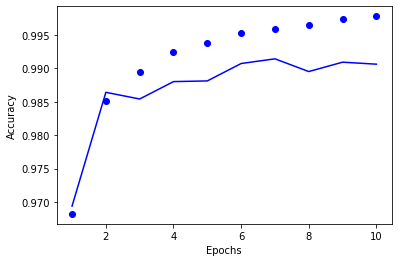

In [ ]:
stats = history.history

import matplotlib.pyplot as plt

epochs = [x for x in range(1, 11)]
plt.plot(epochs, stats['accuracy'], 'bo')
plt.plot(epochs, stats['val_accuracy'], 'b')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model.evaluate(test_x, test_y) #

313/313 [==============================] - 3s 10ms/step - loss: 0.0391 - accuracy: 0.9919


[0.03912465274333954, 0.9919000267982483]